In [5]:
from pickle import load
import numpy as np
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import load_model

In [6]:
max_length = 124
model = load_model('./image_caption_model.h5')

images = './FlowchartData/Images/'

final_code_sentences = []

with open("./pickle/encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

with open("./pickle/wordtoix.pkl", "rb") as encoded_pickle:
    wordtoix = load(encoded_pickle)

with open("./pickle/ixtoword.pkl", "rb") as encoded_pickle:
    ixtoword = load(encoded_pickle)

In [7]:
# predict next token and select the one with highest probability
def greedy_search(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final


def insert_new_line(text):
    with_nl = text.split('\\n')
    return with_nl


def load_test_descriptions(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    references = []
    pic_ids = []
    for testingImg in range(2):
        pic_name = list(encoding_test.keys())[testingImg]
        pic_tokens = pic_name.split('.')
        pic_id = pic_tokens[0]
        pic_ids.append(pic_id)

    for id in pic_ids:
        for line in text.split('\n'):
            tokens = line.split()
            image_id, image_desc = tokens[0], tokens[1:]
            if image_id == id:
                references.append(image_desc)
    return references

Image Name: flowchartTest1.jpg


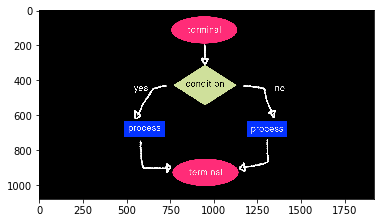

Greedy: 0  terminal start ; \n process ; \n if ( condition ) { \n process ; \n } else { \n process ; \n } \n } \n terminal end ; \n
-----------------------
terminal start ; 
 process ; 
 if ( condition ) { 
 process ; 
 } else { 
 process ; 
 } 
 } 
 terminal end ; 

-----------------------
Image Name: flowchartTest2.jpg


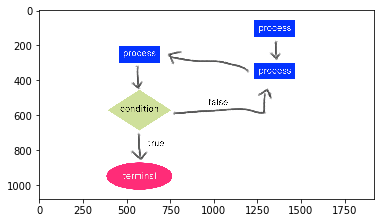

Greedy: 1  terminal start ; \n process ; \n if ( condition ) { \n process ; \n } else { \n process ; \n } \n } \n terminal end ; \n
-----------------------
terminal start ; 
 process ; 
 if ( condition ) { 
 process ; 
 } else { 
 process ; 
 } 
 } 
 terminal end ; 

-----------------------


In [8]:
for testImg in range(2):
    pic = list(encoding_test.keys())[testImg]
    image = encoding_test[pic].reshape((1, 2048))
    x = plt.imread(images + pic)
    print("Image Name: " + pic)
    plt.imshow(x)
    plt.show()
    final_text = greedy_search(image)
    print("Greedy: " + str(testImg) + " ", final_text)
    final_code_sentences.append(final_text.split())
    print('-----------------------')
    print('\n'.join(insert_new_line(final_text)))
    print('-----------------------')
